### Cancer Prediction Project

---
<div align="center">
    <img src= "https://conteudo.imguol.com.br/c/entretenimento/17/2024/04/15/celulas-cancerigenas-cancer-tumor-1713213233586_v2_450x450.jpg">
</div>

<p>Cancer is a disease of the body's cells. Normally cells grow and multiply in a controlled way, however, sometimes cells become abnormal and keep growing. Abnormal cells can form a mass called a tumour.</p>
<p>Cancer is the term used to describe collections of these cells, growing and potentially spreading within the body. As cancerous cells can arise from almost any type of tissue cell, cancer actually refers to about 100 different diseases.</p>

---
#### What am i looking for making this project?
<p>I want to make stastical analysis and forecasting using random forest, because i think this algorithm will be simple and efficient here. Within some option i decided to use it.</p>

---
#### Database
<p>I got this database on the Kaggle by RABIE EL KHAROUA["https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset"]. That was a goob job, congrats!</p>

Some informations about this file

- Age: Integer values representing the patient's age, ranging from 20 to 80.

- Gender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.

- BMI: Continuous values representing Body Mass Index, ranging from 15 to 40.

- Smoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.

- GeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

- PhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

- AlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

- CancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

- Diagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

- Target Variable
    Diagnosis: The main variable to predict, indicating if a patient has cancer.

---
Modules
---

In [17]:
#Required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [18]:
warnings.filterwarnings("ignore")

In [3]:
#Importing dataset
df = pd.read_csv("The_Cancer_data_1500_V2.csv")
df

Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1          3.519683              0          0  
2          4.728368              0          1  
3          2.044636              0          0  
4          3.309849              0          1  
...             ...            ...        ...  
1495       1.284158              0          1  
1496       2.280636              1          1  
1497       0.150101              0          1  
1498       1.986138              1          1  
1499       2.856600              1          0  

[1500 rows x 9 columns]

In [4]:
display(df.head())
display(df.tail())

Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1

Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
1495       1.284158              0          1  
1496       2.280636              1          1  
1497       0.150101              0          1  
1498       1.986138              1          1  
1499       2.856600              1          0

---
#### Checking some info

---

In [10]:
df.shape

(1500, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [12]:
df.describe()

Age       Gender          BMI      Smoking  GeneticRisk  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     50.320000     0.490667    27.513321     0.269333     0.508667   
std      17.640968     0.500080     7.230012     0.443761     0.678895   
min      20.000000     0.000000    15.000291     0.000000     0.000000   
25%      35.000000     0.000000    21.483134     0.000000     0.000000   
50%      51.000000     0.000000    27.598494     0.000000     0.000000   
75%      66.000000     1.000000    33.850837     1.000000     1.000000   
max      80.000000     1.000000    39.958688     1.000000     2.000000   

       PhysicalActivity  AlcoholIntake  CancerHistory    Diagnosis  
count       1500.000000    1500.000000    1500.000000  1500.000000  
mean           4.897929       2.417987       0.144000     0.371333  
std            2.866162       1.419318       0.351207     0.483322  
min            0.002410       0.001215       0.000000     0.000000  
25%            2.434609       1.210598       0.000000     0.000000  
50%            4.834316       2.382971       0.000000     0.000000  
75%            7.409896       3.585624       0.000000     1.000000  
max            9.994607       4.987115       1.000000     1.000000

In [23]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [26]:
df.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

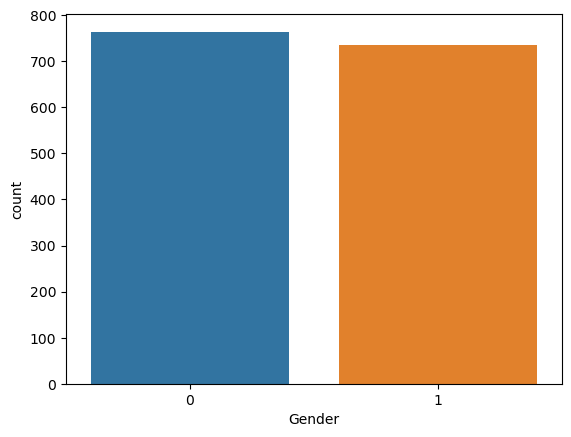

In [40]:
sns.countplot(data=df,x="Gender")

<Axes: xlabel='CancerHistory', ylabel='count'>

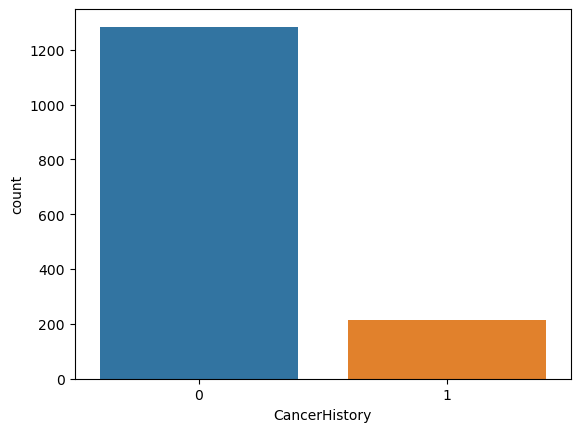

In [22]:
sns.countplot(data=df,x="CancerHistory")

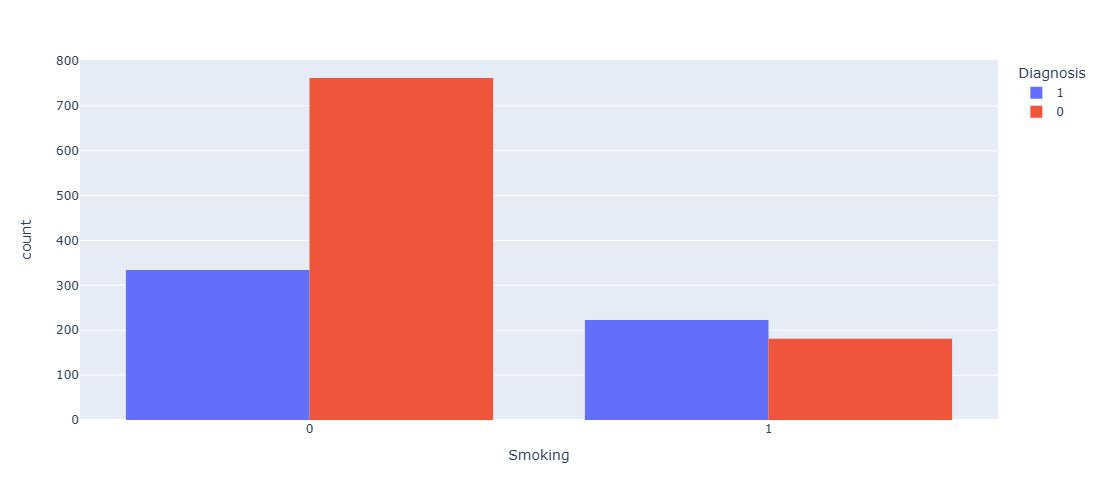

In [20]:
fig = px.histogram(df, x="Smoking",
             color='Diagnosis', barmode='group',
             height=500)
fig.show()

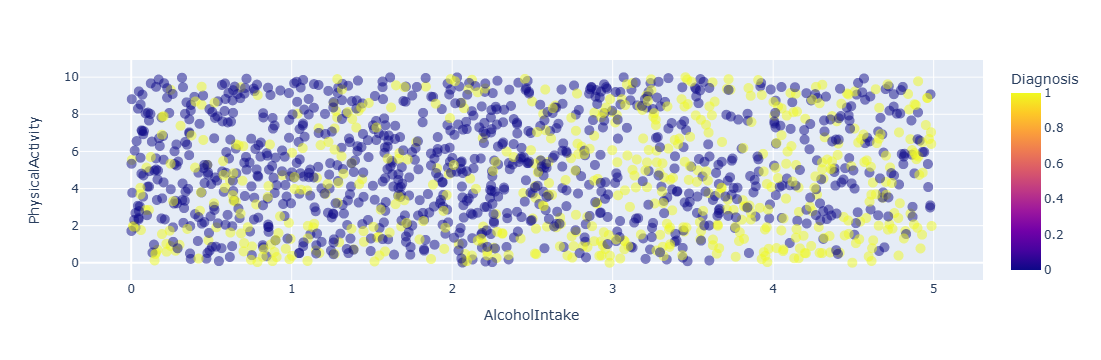

In [54]:
fig = px.scattber(df, x="AlcoholIntake", y="PhysicalActivity",\
                 color="Diagnosis", color_discrete_sequence=px.colors.qualitative.Alphabet, \
                opacity = 0.5)

fig.update_traces(marker={'size':10})
fig.show()

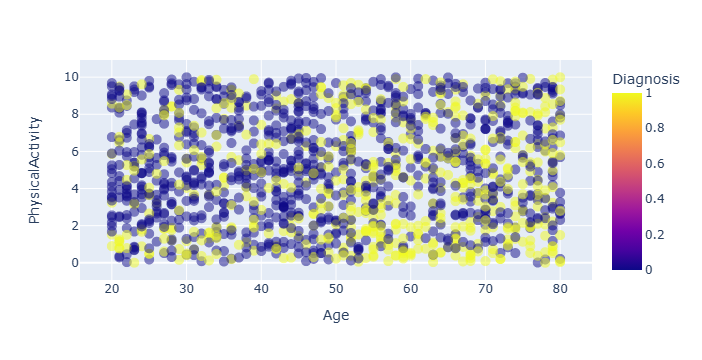

In [22]:
fig = px.scatter(df, x="Age", y="PhysicalActivity",\
                 color="Diagnosis", color_discrete_sequence=px.colors.qualitative.Alphabet, \
                opacity = 0.5)

fig.update_traces(marker={'size':10})
fig.show()

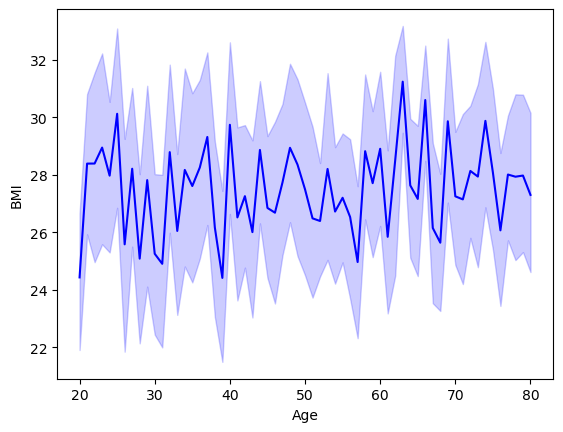

In [35]:
sns.lineplot(df,x='Age',y='BMI',color="Blue")

plt.show()

In [8]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [44]:
#These columns will be changed [Age, BMI,PhysicalActivity,AlcoholIntake]
X_cancer = df.iloc[:,[0,2,5,6]].values

In [45]:
X_cancer

array([[58.        , 16.08531332,  8.14625056,  4.14821903],
       [71.        , 30.82878439,  9.36163042,  3.51968334],
       [48.        , 38.78508356,  5.13517867,  4.72836769],
       ...,
       [63.        , 32.6138607 ,  0.4668482 ,  0.15010113],
       [55.        , 25.56821592,  7.79531682,  1.98613765],
       [67.        , 23.6631042 ,  2.52586007,  2.85660008]])

In [46]:
X_cancer[0]

array([58.        , 16.08531332,  8.14625056,  4.14821903])

In [48]:
Y_cancer = df.iloc[:,8].values

In [49]:
Y_cancer

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler_cancer = StandardScaler()
X_cancer = scaler_cancer.fit_transform(X_cancer)

In [57]:
X_cancer[0]

array([ 0.43549546, -1.58116185,  1.1337129 ,  1.21946526])

In [58]:
from sklearn.model_selection import train_test_split